## 2.3. Содержание ноутбука HW02.ipynb
### 2.3.1. Загрузка данных и первичный осмотр

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('S02-hw-dataset.csv') # загрузка датасета

print("\nпервые строки датасета:")
print(data.head())
print("\nинформация о столбцах и типах:")
print(data.info())
print("\nбазовые описательные статистики:")
print(data.describe())


первые строки датасета:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

информация о столбцах и типах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

базовые описательные статистики:
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   

## 2.3.2. Пропуски, дубликаты и базовый контроль качества

In [10]:
print("доля пропусков в каждом столбце:")
print(data.isna().mean())
print("\nналичие полностью дублирующих строк:")
print(data.duplicated().sum())
print("\n«подозрительные» случаи, исходя из смысла датасета:")
ps = data[((data["age"] < 0) |
           (data["age"] > 100) |
           (data["purchases"] < 0) |
           (data["revenue"] < 0) |
           ((data["purchases"] > 0) & (data["revenue"] <= 0)) |
           ((data["revenue"] <= 0) & (data["purchases"] > 0)) |
           (data["user_id"] < 0))]

print(ps)

доля пропусков в каждом столбце:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

наличие полностью дублирующих строк:
1

«подозрительные» случаи, исходя из смысла датасета:
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0


#### Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены:

- пропуски в признаке age
- 1 дублируящая строка
- 2 логически подозрительных случая:
    - age=120 и purchases=-1
    - purchases=4, но при этом revenue=0

### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

In [30]:
print("\nчастоты")
print(data["country"].value_counts(), data["country"].value_counts(normalize=True))

print("\nВыполнить хотя бы одну осмысленную группировку")
group = data.groupby("country")
print(group.size())
print()
print(group[["age", "purchases", "revenue"]].median())

print("\nПри необходимости ввести дополнительные «коридоры» (bins) или группировки")
bins = [0, 20, 40, 80, 100, 130]
data["age_group"] = pd.cut(data["age"], bins=bins)
print(data.groupby("age_group", observed=False).size())
print(data.groupby("age_group", observed=False)[["age", "purchases", "revenue"]].median())


частоты
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64 country
RU    0.317073
FR    0.292683
US    0.195122
DE    0.146341
CN    0.048780
Name: proportion, dtype: float64

Выполнить хотя бы одну осмысленную группировку
country
CN     2
DE     6
FR    12
RU    13
US     8
dtype: int64

          age  purchases  revenue
country                          
CN       24.0        4.5   1054.0
DE       35.0        6.0   1200.0
FR       42.0        6.0    619.5
RU       26.0        6.0    650.0
US       39.0        4.0    537.5

При необходимости ввести дополнительные «коридоры» (bins) или группировки
age_group
(0, 20]        3
(20, 40]      23
(40, 80]      12
(80, 100]      0
(100, 130]     1
dtype: int64
              age  purchases  revenue
age_group                            
(0, 20]      18.0        7.0   1488.0
(20, 40]     28.0        5.0    650.0
(40, 80]     49.0        3.5    562.5
(80, 100]     NaN        NaN      NaN
(100, 130]  120.0       -1.0    

#### Кратко (1-2 абзаца) описать текстом основные наблюдения:
- Доминируют пользователи из России и Франции
- В среднем юольше покупок у пользователей 0-20 лет
- В данных присутствуют аномальные случаи (например, возраст 120 лет с отрицательным числом покупок)


## 2.4. Визуализация данных в Matplotlib

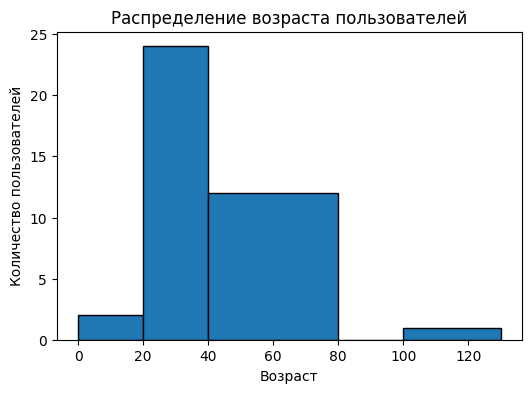

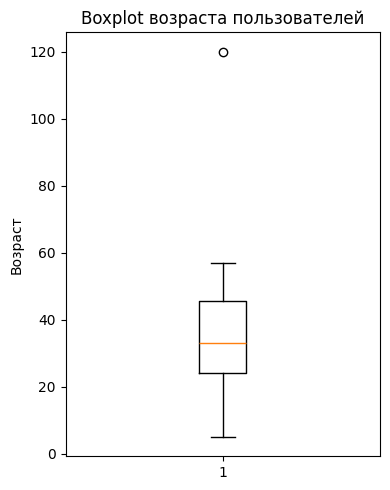

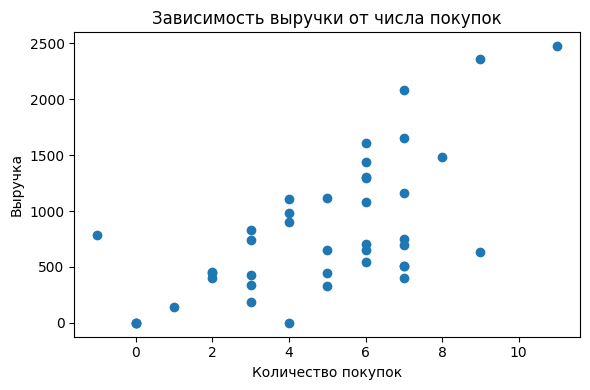

In [47]:
# Одну гистограмму для количественного признака
plt.figure(figsize=(6, 4))
plt.hist(data["age"].dropna(), bins=bins, edgecolor="black")
# распределение возраста по категориям
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.title("Распределение возраста пользователей")

plt.savefig("figures/h.png")
plt.show()
# больше всего пользователйе 20-40 лет

# Один боксплот (boxplot) для количественного признака:
plt.figure(figsize=(4, 5))
plt.boxplot(data["age"].dropna(), vert=True)

plt.ylabel("Возраст")
plt.title("Boxplot возраста пользователей")

plt.tight_layout()
plt.savefig("figures/bp.png")
plt.show()
# есть выбросы


# Один scatter plot (диаграмма рассеяния) для пары количественных признаков:
plt.figure(figsize=(6, 4))
plt.scatter(data["purchases"], data["revenue"])

plt.xlabel("Количество покупок")
plt.ylabel("Выручка")
plt.title("Зависимость выручки от числа покупок")

plt.tight_layout()

plt.savefig("figures/sp.png")
plt.show()
# при большем количестве покупок выручка растет